# Daily returns of US stock market indices

In this lab, we examine how the three major US stock market indices performed this year using data from Yahoo! Finance.

# Download data from Yahoo! Finance

Use the [`yfinance`](https://pypi.org/project/yfinance/) library and its `download()` 
function to obtain the time series of daily observations for the 
[S&P 500](https://en.wikipedia.org/wiki/S%26P_500), the 
[Dow Jones Industrial Average (DJIA)](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average) 
and the 
[NASDAQ Composite](https://en.wikipedia.org/wiki/Nasdaq_Composite) 
indices. 
Restrict the sample to the period from 2023-01-01 to 2023-04-30
and keep only the closing price stored in column `Close`.

_Hint_: The corresponding ticker symbols are `^GSPC`, `^DJI`, `^IXIC`, respectively.

Rename the DataFrame columns to `'SP500'`, `'Dow Jones'` and `'NASDAQ'` using the 
[`rename()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) 
method.

_Hint_: You may need to first install `yfinance` as follows (in particular when running on Google Colab):

In [1]:
# Uncomment this to install yfinance in your Python environment
#! pip install yfinance

*Note:* If you cannot import `yfinance`, e.g., because you are using the Jupyter Lite environment, you can load the data from a the CSV file located in the same directory as this notebook as follows:

```python
import pandas as pd

# Uncomment this to use file in local directory
DATA_PATH = '.'

# Uncomment this to load data directly from GitHub
# DATA_PATH = 'https://raw.githubusercontent.com/richardfoltyn/python-intro-PGR/main/labs'

data = pd.read_csv(
    f'{DATA_PATH}/US-stock-indices.csv', 
    index_col='Date', 
    parse_dates=True
)
```

#### Solution

In [2]:
import yfinance as yf

# List of ticker symbols
tickers = ['^GSPC', '^DJI', '^IXIC']

# Period
start = '2023-01-01'
end = '2023-04-30'

data = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  3 of 3 completed


As you can see, the resulting DataFrame has a hierarchical column index, with the first level being the variable names (`Adj Close`, `Close`, etc.) and the second level comprising the ticker symbols.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2023-01-03 to 2023-04-28
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, ^DJI)   81 non-null     float64
 1   (Adj Close, ^GSPC)  81 non-null     float64
 2   (Adj Close, ^IXIC)  81 non-null     float64
 3   (Close, ^DJI)       81 non-null     float64
 4   (Close, ^GSPC)      81 non-null     float64
 5   (Close, ^IXIC)      81 non-null     float64
 6   (High, ^DJI)        81 non-null     float64
 7   (High, ^GSPC)       81 non-null     float64
 8   (High, ^IXIC)       81 non-null     float64
 9   (Low, ^DJI)         81 non-null     float64
 10  (Low, ^GSPC)        81 non-null     float64
 11  (Low, ^IXIC)        81 non-null     float64
 12  (Open, ^DJI)        81 non-null     float64
 13  (Open, ^GSPC)       81 non-null     float64
 14  (Open, ^IXIC)       81 non-null     float64
 15  (Volume, ^DJI)      81 non-null     int

The columns in the hierarchical `MultiIndex` are difficult to work with, so we only keep the `Close` column and discard the remaining data:

In [4]:
# Keep only Close column
data = data['Close']

Lastly, we get rid of the inconvenient column names and replace them with something more readable.

In [5]:
# Rename to get nicer column names
names = {
    '^GSPC': 'SP500', 
    '^DJI': 'Dow Jones', 
    '^IXIC': 'NASDAQ'
}
    
data = data.rename(columns=names)

We can get a peak at the first few rows using the `head()` method.

In [6]:
data.head(3)

,Dow Jones,SP500,NASDAQ
Date,,,
2023-01-03,33136.371094,3824.139893,10386.980469
2023-01-04,33269.769531,3852.969971,10458.759766
2023-01-05,32930.078125,3808.100098,10305.240234


# Plot daily closing prices

Plot the three time series (one for each index) in a single graph. Label all axes and make sure your graph contains a legend.

_Hint:_ You can directly use the [`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) 
method implemented in `pandas`.

#### Solution

<Axes: xlabel='Date', ylabel='Value at close'>

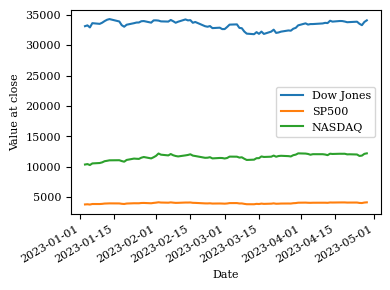

In [7]:
# Plot all three indices, setting a label for the y-axis.
data.plot(ylabel='Value at close')

# Plot normalised daily closing prices

The graph you created in the previous sub-question is not well-suited to illustrate how each index developed in 2023 since the indices are reported on vastly different scales (the S&P500 appears to be an almost flat line).

To get a better idea about how each index fared in 2023 relative to its value at the beginning of the year, normalize each index by its value on the first trading day in 2023 (which was 2023-01-03). Plot the resulting normalised indices.

#### Solution

To normalise each column by its first value, we use the [`transform()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html) method. Recall that `transform()` applies some operation to each element of a column, but does not change the number of elements (as opposed to aggregation or reduction methods).

In [8]:
# transform() is executed by column (i.e., for each ticker symbol).
# We need to normalise each column Series by its first element.
close_norm = data.transform(lambda x: x / x.iloc[0])

You can use `head()` to verify that the first normalised element of each column is now 1.

In [9]:
close_norm.head(3)

,Dow Jones,SP500,NASDAQ
Date,,,
2023-01-03,1.000000,1.000000,1.000000
2023-01-04,1.004026,1.007539,1.006911
2023-01-05,0.993774,0.995806,0.992131


Finally, we plot the normalised indices just like in the previous sub-question. It is now much easier to see that these indices moved very similarly over this year.

<Axes: xlabel='Date', ylabel='Norm. value'>

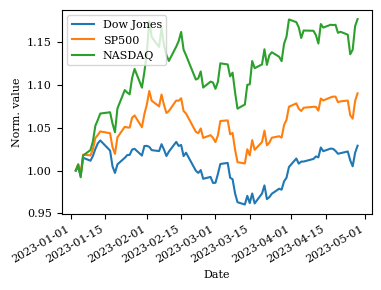

In [10]:
close_norm.plot(ylabel='Norm. value')

# Compute and plot the daily returns

For each index, compute the daily returns, i.e., the relative change vs. the previous closing price in percent.

Create a plot of the daily returns for all indices.

#### Solution

We use the [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) method to compute the relative difference between two consecutive closing prices.

In [11]:
# Relative difference from previous closing price in percent
returns = data.pct_change() * 100.0

Because we cannot compute a difference for the very first observation, this value is set to `NaN`.

In [12]:
returns.head(3)

,Dow Jones,SP500,NASDAQ
Date,,,
2023-01-03,NaN,NaN,NaN
2023-01-04,0.402574,0.753897,0.691051
2023-01-05,-1.021021,-1.164553,-1.467856


<Axes: xlabel='Date', ylabel='Daily return in %'>

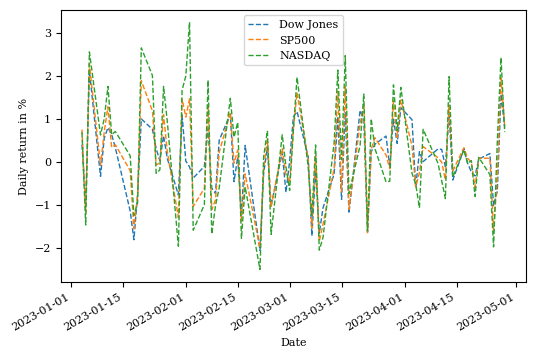

In [13]:
# use dashed lines since daily returns are overlapping
returns.plot(ylabel='Daily return in %', lw=1.0, ls='--', figsize=(6, 4))

# Plot the distributions of daily returns

Compute the average daily returns and the volatility (standard deviation) for each index. Create a histogram of daily returns for each index using 25 bins (i.e., create a figure with 3 panels). 
For each histogram, add the density of a normal distribution that has the same mean and variance.

*Hint:* You can either use [`DataFrame.hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) to plot the histogram, or Matplotlib's [`hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist) function. In either case, you should add `density=True` such that the histogram is appropriately rescaled and comparable to the normal density.

*Hint:* Use the `pdf()` method of the [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) class to compute the normal density.

#### Solution

We compute the column-wise mean and standard deviation using the functions `mean` and `std`. We can do this in a single call if we pass these to [`agg()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html).

In [14]:
moments = returns.agg(['mean', 'std'])
moments

,Dow Jones,SP500,NASDAQ
mean,0.039391,0.113019,0.212472
std,0.855634,0.995370,1.309395


To plot the histograms of daily returns, we use can directly call the `hist()` method of the `DataFrame` object. This method returns a collection of axes which we can subsequently use to add the normal density for each index. Note that we need to do this in a loop as use the correct mean and std. dev. for each index.

Text(66.97222222222221, 0.5, 'Density')

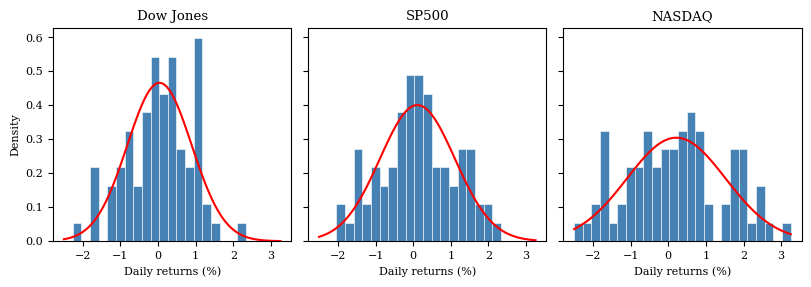

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

xmin, xmax = returns.min().min(), returns.max().max()

# Use DataFrame.plot() to create histograms
axes = returns.hist(bins=25, figsize=(8, 2.75), 
    grid=False, layout=(1, 3), 
    sharex=True, sharey=True, 
    density=True, range=(xmin, xmax), 
    color='steelblue', edgecolor='white', lw=0.4
)

# Impose tighter figure layout
plt.gcf().tight_layout()

# common x-values used to plot normal PDF
xvalues = np.linspace(xmin, xmax, 100)

# Iterate through axes and add normal PDF
for i, ax in enumerate(axes.flatten()):

    # Mean and standard deviation for current index
    mean = moments.iloc[0, i]
    std = moments.iloc[1, i]
    
    # Evaluate PDF at common xvalues
    pdf = norm.pdf(xvalues, loc=mean, scale=std)
    # Plot PDF
    ax.plot(xvalues, pdf, lw=1.5, c='red', zorder=100)

    # Label x-axis
    ax.set_xlabel('Daily returns (%)')

# Label left-most y-axis
axes[0,0].set_ylabel('Density')
    

# Compute and plot the pairwise correlations

Compute the pairwise correlations between the daily returns of each index pair. Create a 3-by-3 graph where each panel contains a bivariate scatter plot of the daily returns of one index vs. another.

*Hint:* You can use the function [`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) to accomplish this task. Alternatively, you can create a figure with 3-by-3 subplots using Matplotlib's 
[`subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html), iterate over all rows and columns and add a [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) plot to each `axes` object.

#### Solution

To compute the pairwise correlation between all columns, we call [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html). The results show that all three daily returns are highly correlated, which is what we would have expected from looking at the time series of daily returns we plotted earlier.

Note that in all these operations, the `NaN` in the first row are automatically excluded.

In [16]:
returns.corr()

,Dow Jones,SP500,NASDAQ
Dow Jones,1.000000,0.917530,0.772169
SP500,0.917530,1.000000,0.946892
NASDAQ,0.772169,0.946892,1.000000


We can plot the pairwise correlations using the [`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) contained in `pandas.plotting` which takes a `DataFrame` as its argument and creates pairwise scatter plots for all columns. The function either plots a histogram or a kernel density plot along the main diagonal since creating a scatter plot of one and the same variable against itself just yields a diagonal line!

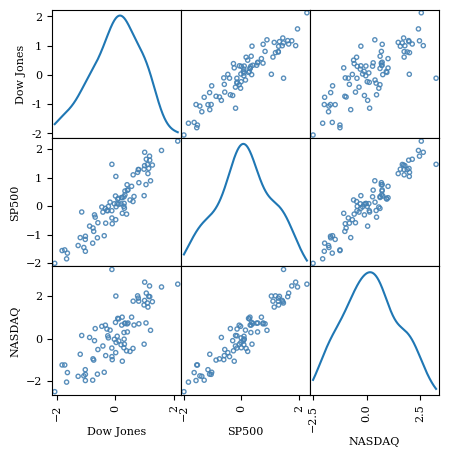

In [17]:
from pandas.plotting import scatter_matrix

# Create figure with 3x3 scatter plots. Main diagonal shows kernel density
# for each index.
axes = scatter_matrix(returns, figsize=(5, 5), alpha=0.9, color='none', 
    edgecolor='steelblue', diagonal='kde')

Alternatively, it is straightforward to create the 3-by-3 scatter plots manually. We first ask Matplotlib to create a figure with 3-by-3 panels and then iterate over rows and columns, using `ax.scatter()` to add the bivariate scatter plot to each panel.

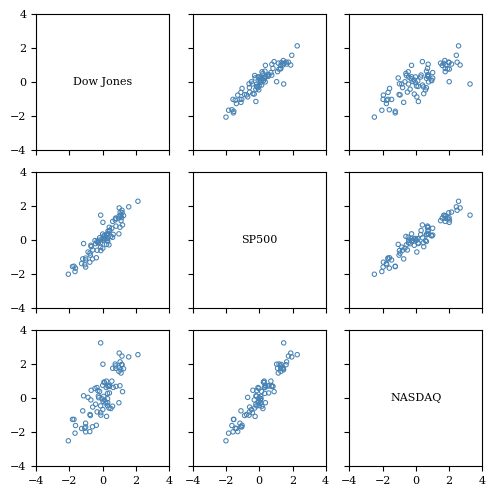

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(5, 5), sharex=True, sharey=True)

labels = returns.columns.to_list()

# Iterate over rows and columns
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):

        ax = axes[i, j]

        # For diagonal panels, print the index name instead of
        # (exactly diagonal) scatter plot.
        if i == j:
            ax.text(0.5, 0.5, labels[i], transform=ax.transAxes, 
                va='center', ha='center')
            continue

        # Get x- and y-values for this panel
        xvalues = returns.iloc[:, j]
        yvalues = returns.iloc[:, i]

        ax.scatter(xvalues, yvalues, s=10, alpha=1.0, lw=0.75,
            color='none', edgecolors='steelblue')

        # Set uniform x- and y-ticks for all axes
        ticks = np.linspace(-4, 4, 5)
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)

fig.tight_layout()